<a href="https://colab.research.google.com/github/AbuTalhaGT/ML-Algorithms/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Dataset

## About Dataset


Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.


Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)

Sources:

(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990


Number of Instances: 768
Number of Attributes: 8 plus class
For Each Attribute: (all numeric-valued)

    Number of times pregnant
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    Diastolic blood pressure (mm Hg)
    Triceps skin fold thickness (mm)
    2-Hour serum insulin (mu U/ml)
    Body mass index (weight in kg/(height in m)^2)
    Diabetes pedigree function
    Age (years)
    Class variable (0 or 1)

Missing Attribute Values: Yes
Class Distribution: (class value 1 is interpreted as ("tested positive for

diabetes")


OSEMN Pipeline

    O - Obtaining our data
    S - Scrubbing / Cleaning our data
    E - Exploring / Visualizing our data will allow us to find patterns and trends
    M - Modeling our data will give us our predictive power as a wizard
    N - INterpreting our data

Reference Notebook from Kaggle :https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [4]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Correct file path for the uploaded file
file_path = '/content/diabetes.xls'

# Since the file seems to be a CSV file with an .xls extension, read it as a CSV
df = pd.read_csv(file_path)

# Save it back as a proper CSV file
csv_file_path = 'diabetes.csv'
df.to_csv(csv_file_path, index=False, header=True)

# Display the DataFrame to verify
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Basic EDA and Statistical Analysis

In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



## The Question creeping out of this summary

### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

    Glucose
    BloodPressure
    SkinThickness
    Insulin
    BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values.





In [9]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


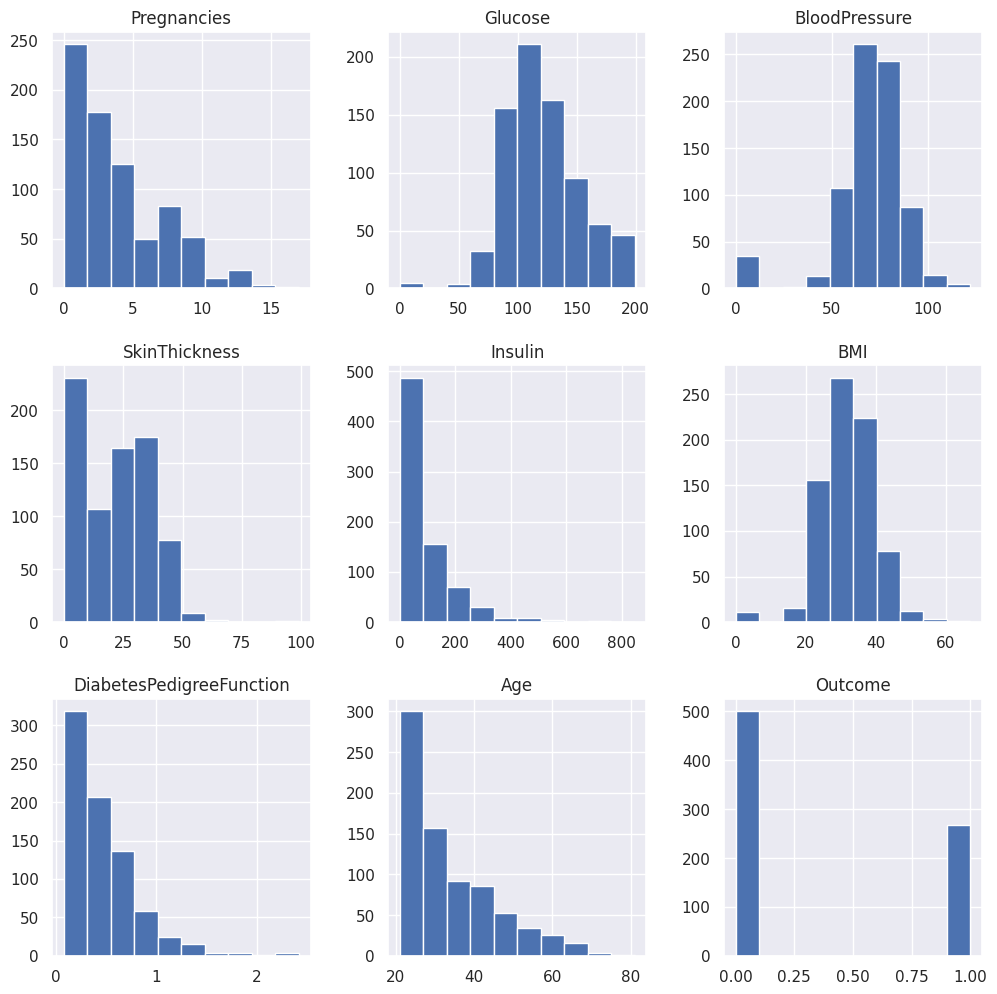

In [10]:
plot_hist = df.hist(figsize = (12,12))


Aiming to impute nan values for the columns in accordance with their distribution.

## Interpretation of Plots

### X-axis: Values or ranges of values from the column being plotted.

### Y-axis: Count of how many times values fall into the corresponding range on the x-axis.

In [11]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)


### Plotting after Nan removal

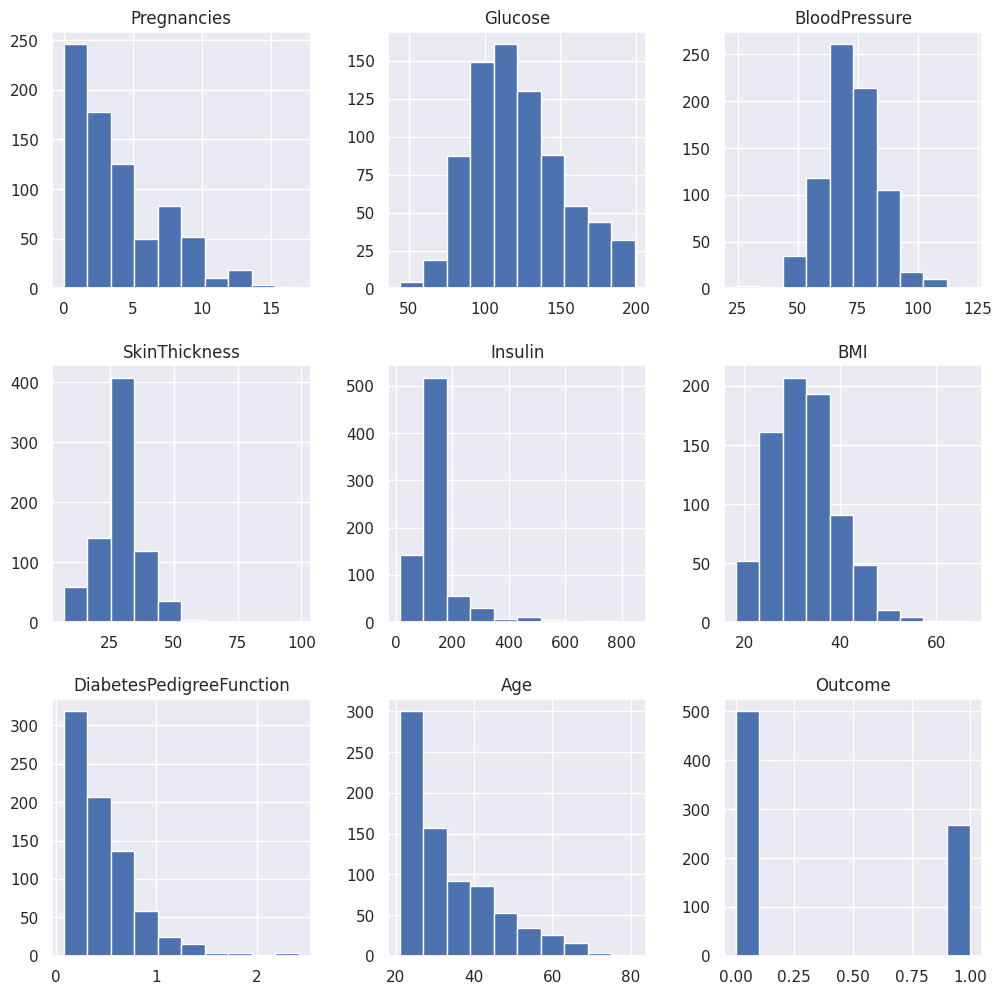

In [12]:
plot_hist = df_copy.hist(figsize = (12,12))

### A **left-skewed** distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That is because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

### A **right-skewed** distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That is because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

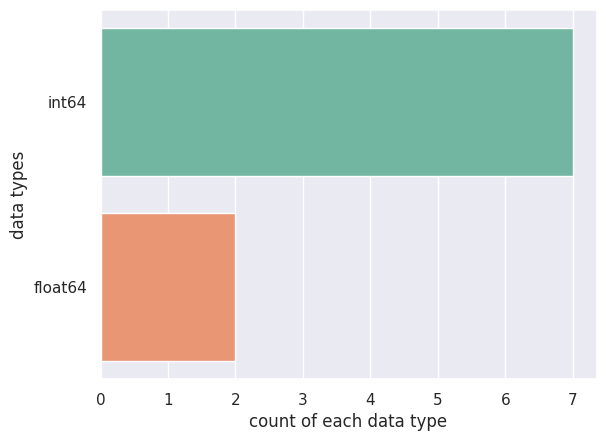

In [13]:
sns.countplot(y=df.dtypes ,data=df, palette='Set2')
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

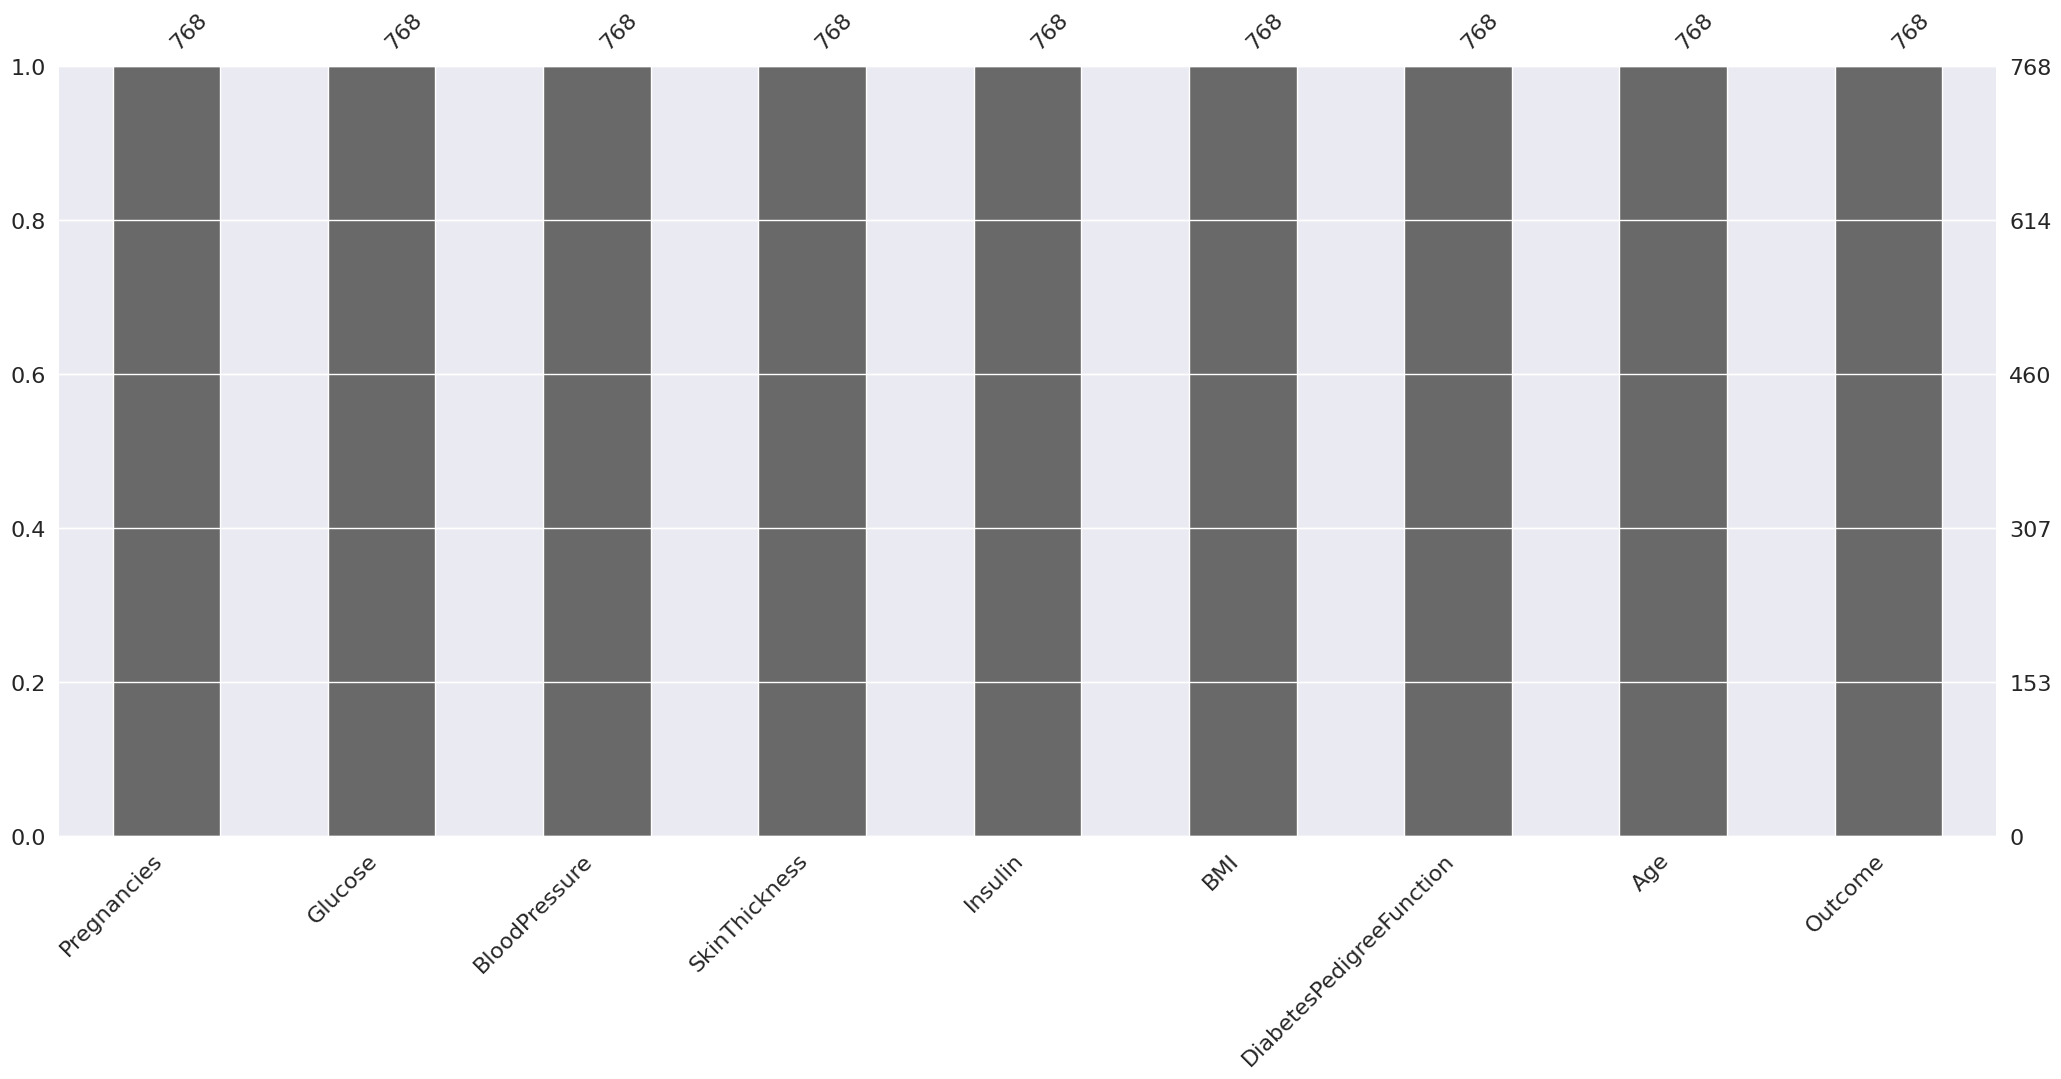

In [14]:
## null count analysis
import missingno as msno
p=msno.bar(df)

## Interpreting the Bars:

X-axis (Columns):

Each bar represents one column from your DataFrame (e.g., Glucose, BloodPressure, etc.).
The columns are labeled on the x-axis.
Y-axis (Count of Non-Missing Values):

The y-axis shows the count of non-missing (or present) values in each column.
The height of the bar corresponds to the number of non-null entries in that column.
Bar Height:

A full-height bar means the column has no missing values (100% of the data is present).
A shorter bar means there are missing values in that column (the gap between the top of the bar and the maximum y-axis value represents the number of missing values).
Gaps in the Bars:

Any gap or missing portion in the bar indicates that a certain number of values are NaN or missing in that column.
The gap size gives you a visual sense of how much data is missing for each feature.


Outcome
0    500
1    268
Name: count, dtype: int64


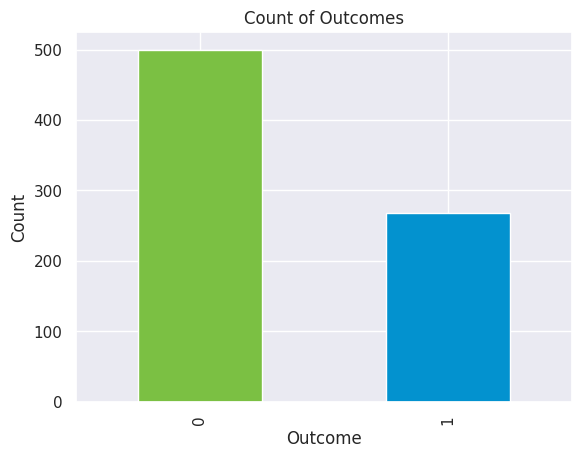

In [15]:
# Define the color mapping for Outcome values
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))

# Print the count of Outcome values
print(df.Outcome.value_counts())

# Plotting the bar chart with different colors
p = df.Outcome.value_counts().plot(kind="bar", color=colors)

# Adding labels
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Count of Outcomes")

# Show the plot
plt.show()


### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients.

### Imbalanced Data Problem


### Scatter matrix of uncleaned data


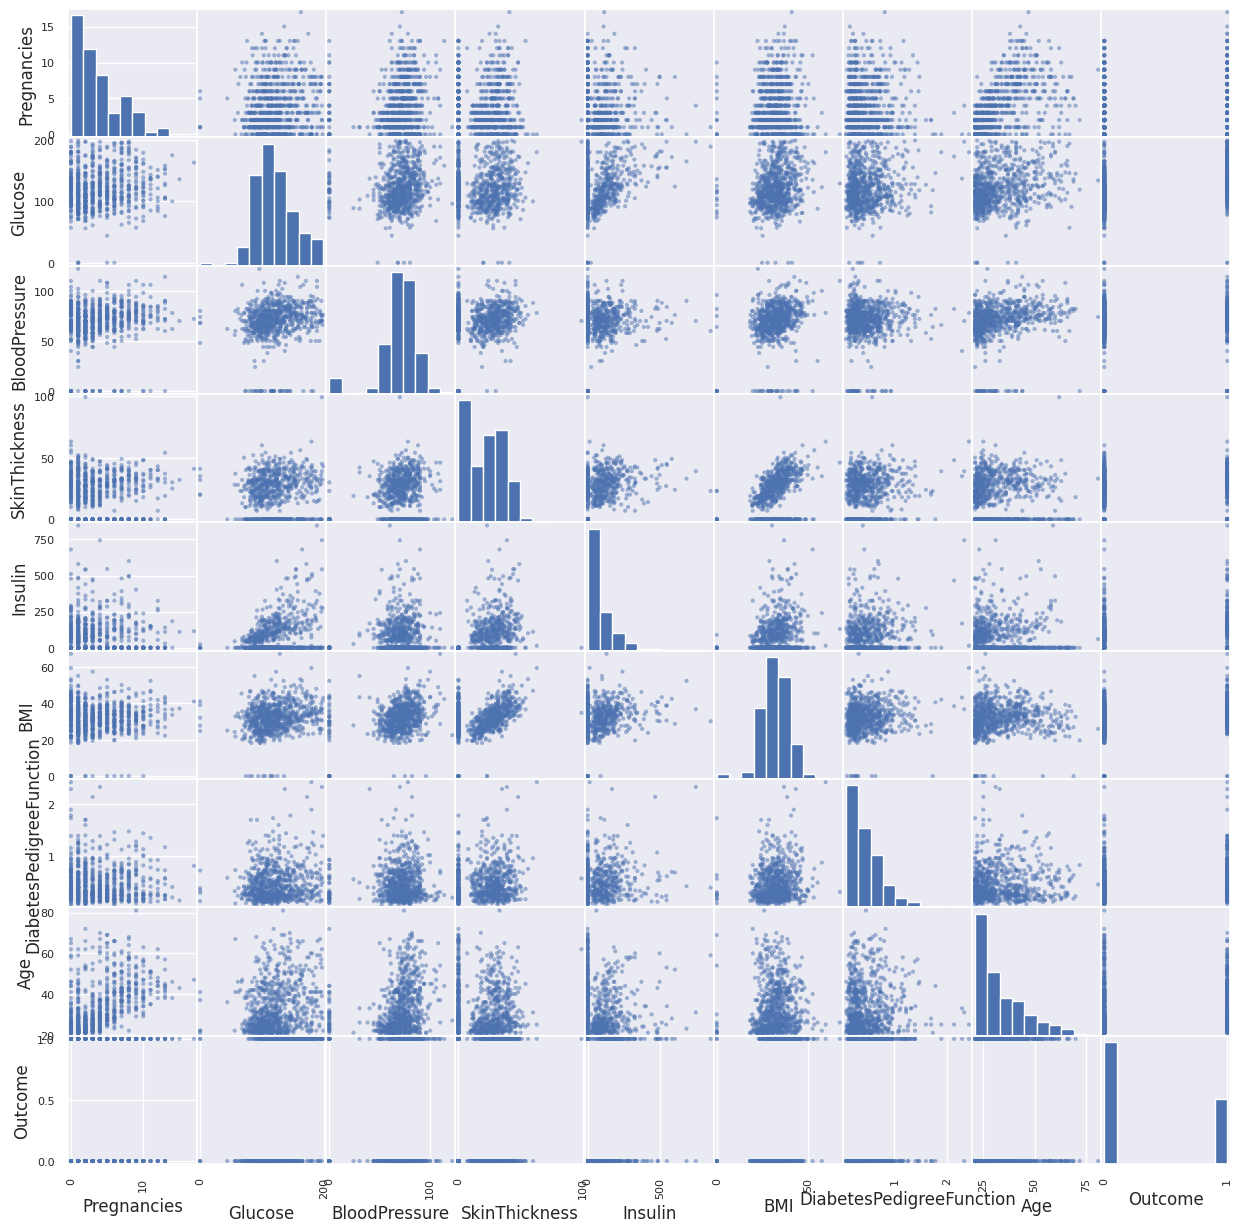

In [16]:
from pandas.plotting import scatter_matrix
plot_scatter =scatter_matrix(df,figsize=(15, 15))


## Components of the Scatter Matrix:

Diagonal Plots:
On the diagonal of the grid, you’ll typically see histograms or density plots of each variable, showing the distribution of values within that specific variable.

Off-diagonal Scatter Plots:
In the off-diagonal plots, each point represents the values of two variables plotted against each other. These scatter plots show the relationship between the two variables.


The x-axis corresponds to one variable and the y-axis corresponds to another variable.

For instance:
If you look at the plot at row 2, column 1, it shows the relationship between variable 2 on the y-axis and variable 1 on the x-axis.

## Interpreting the Scatter Plots:

Linear Relationships:

If the points form a straight line (either upward or downward), there’s a linear relationship between the two variables.
Upward slope: Indicates a positive correlation (when one variable increases, the other also tends to increase).
Downward slope: Indicates a negative correlation (when one variable increases, the other tends to decrease).
A cluster of points with no clear pattern indicates little or no linear correlation.

## Strength of Relationships:

If the points are closely packed along a line, it means there’s a strong correlation between the two variables.

If the points are widely scattered, it suggests a weak or no correlation.
Outliers:

Scatter plots can also help detect outliers—points that fall far from the general cluster. Outliers may indicate anomalies or errors in the data.

Diagonal Histograms/Density Plots:
These diagonal plots give a sense of the distribution of each individual variable.

A symmetric, bell-shaped curve suggests a normal distribution.
A skewed histogram indicates that the values are concentrated more on one side (e.g., most values are low with a few high values).
A multimodal distribution (multiple peaks) suggests that the data has distinct groups or clusters.

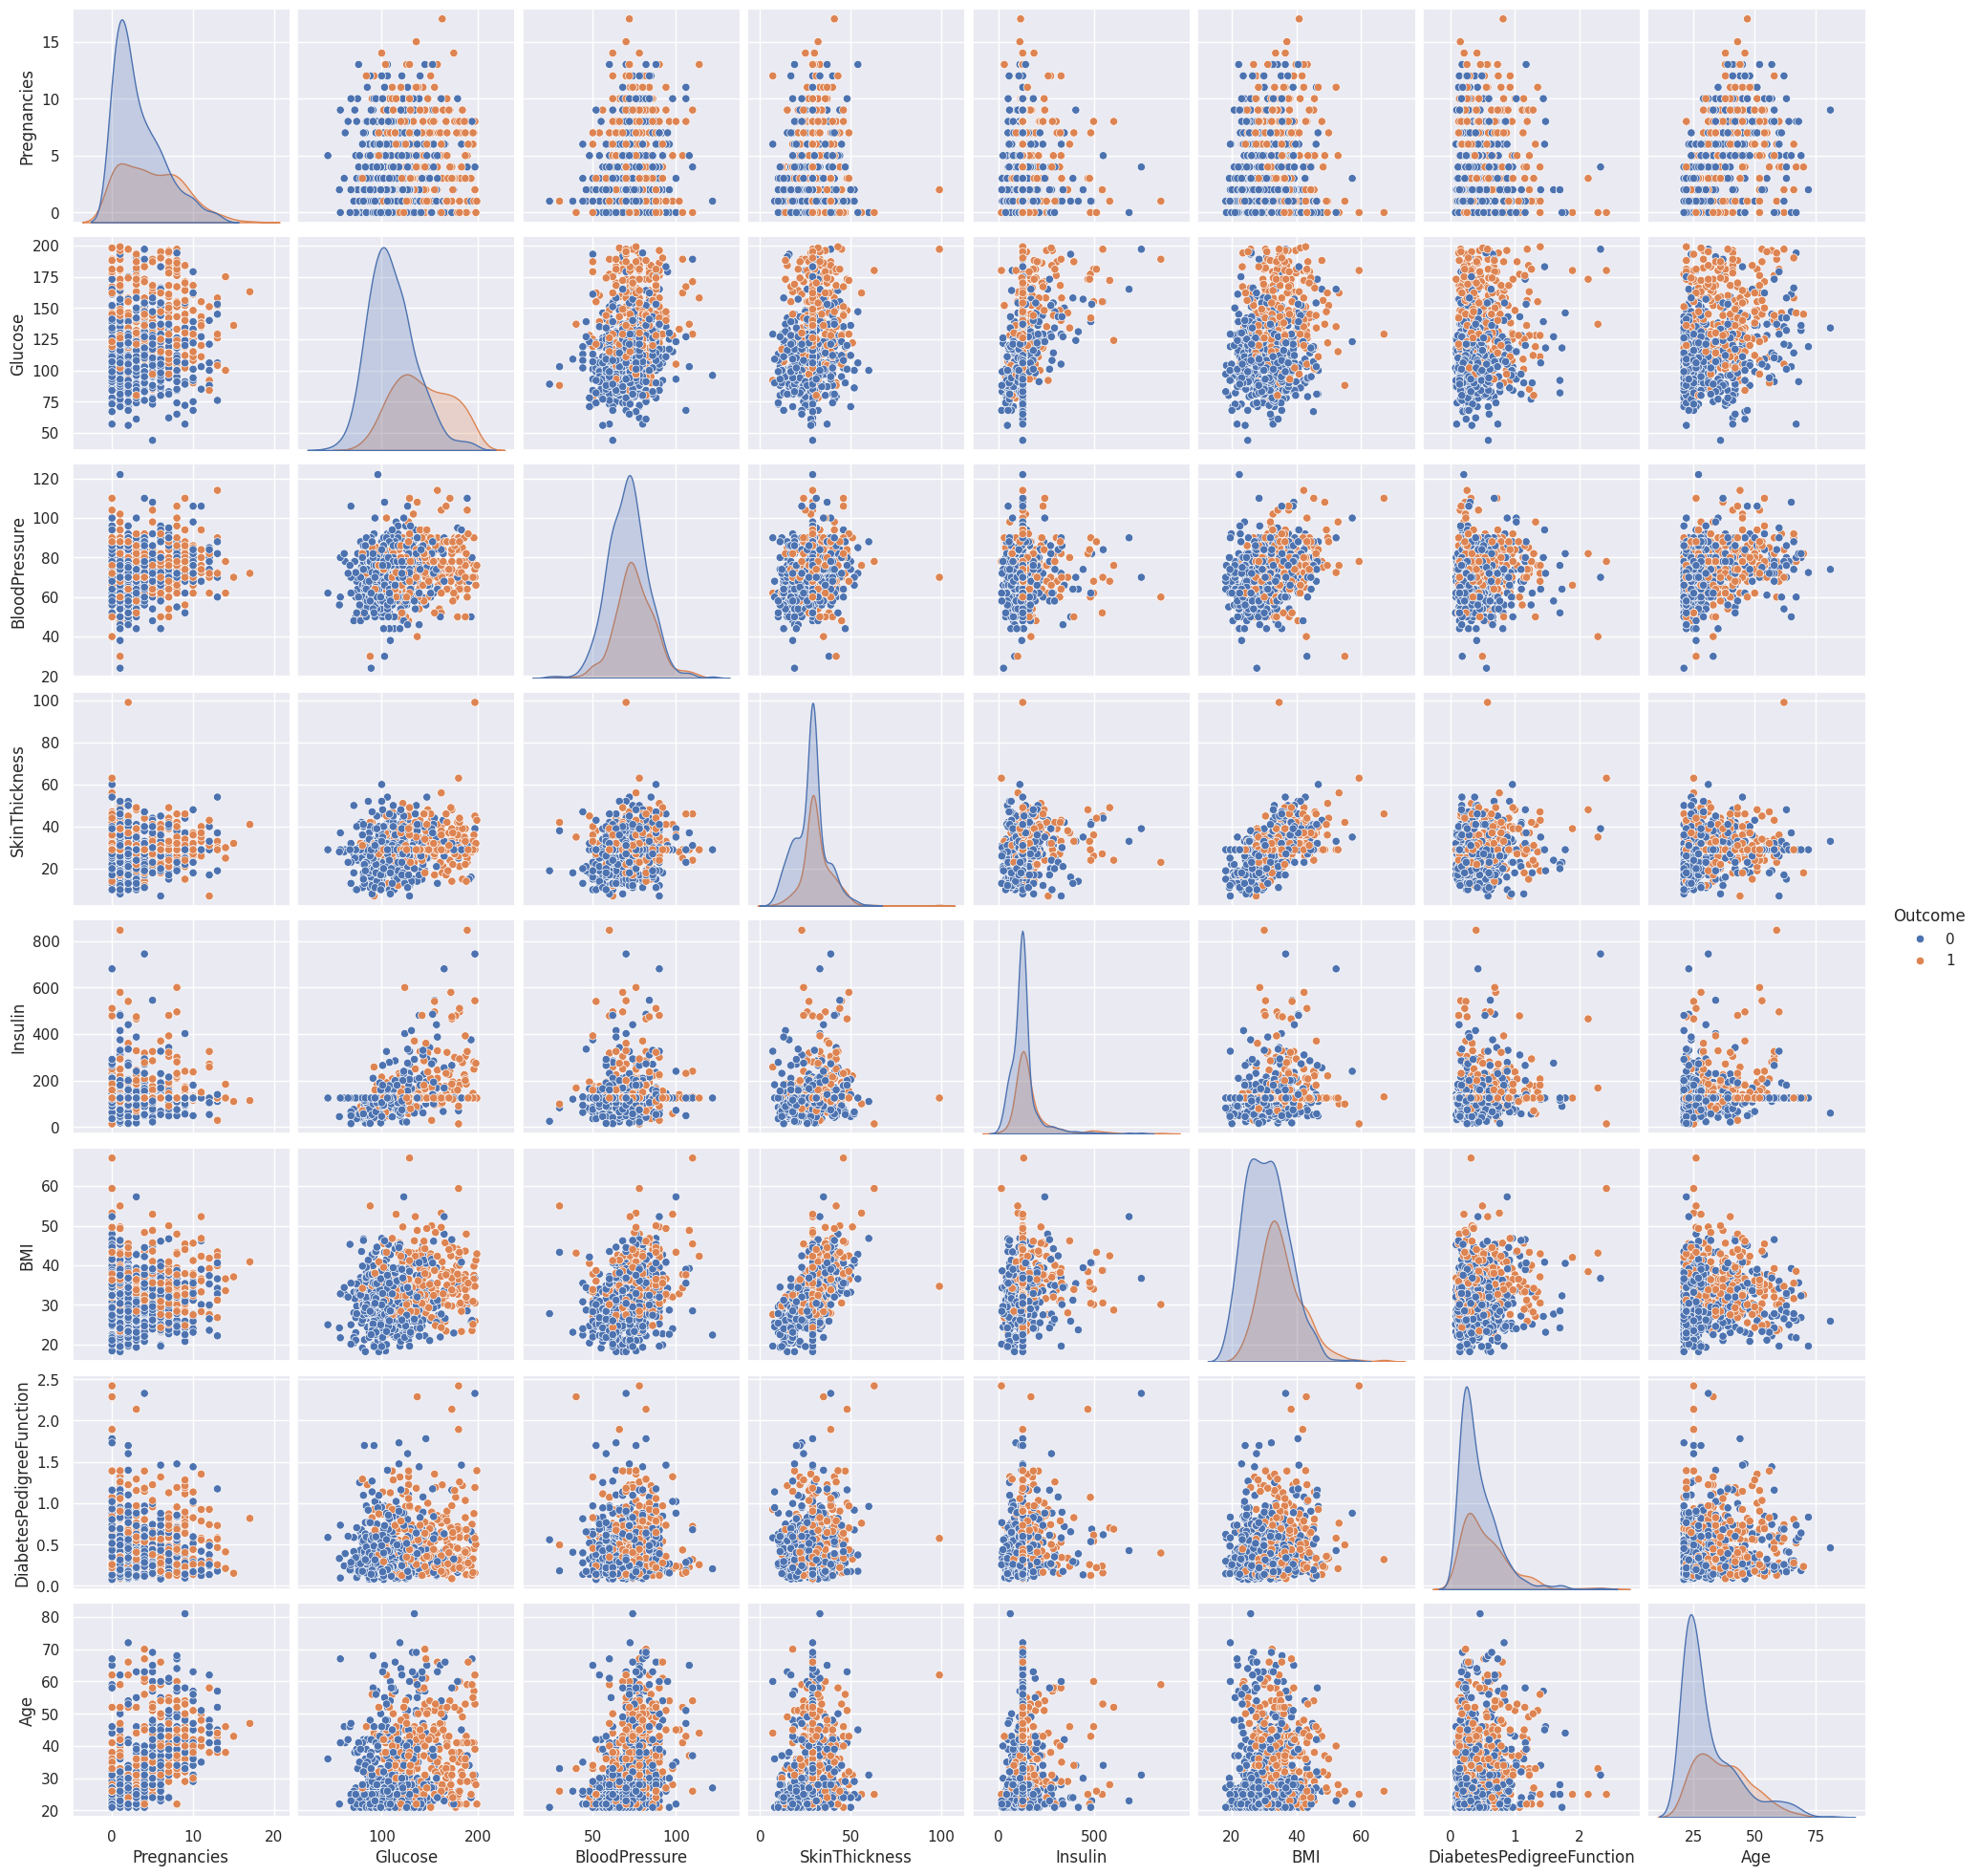

In [17]:
plot_pair =sns.pairplot(df_copy, hue = 'Outcome')



### Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

### A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.



### Heatmap for unclean data


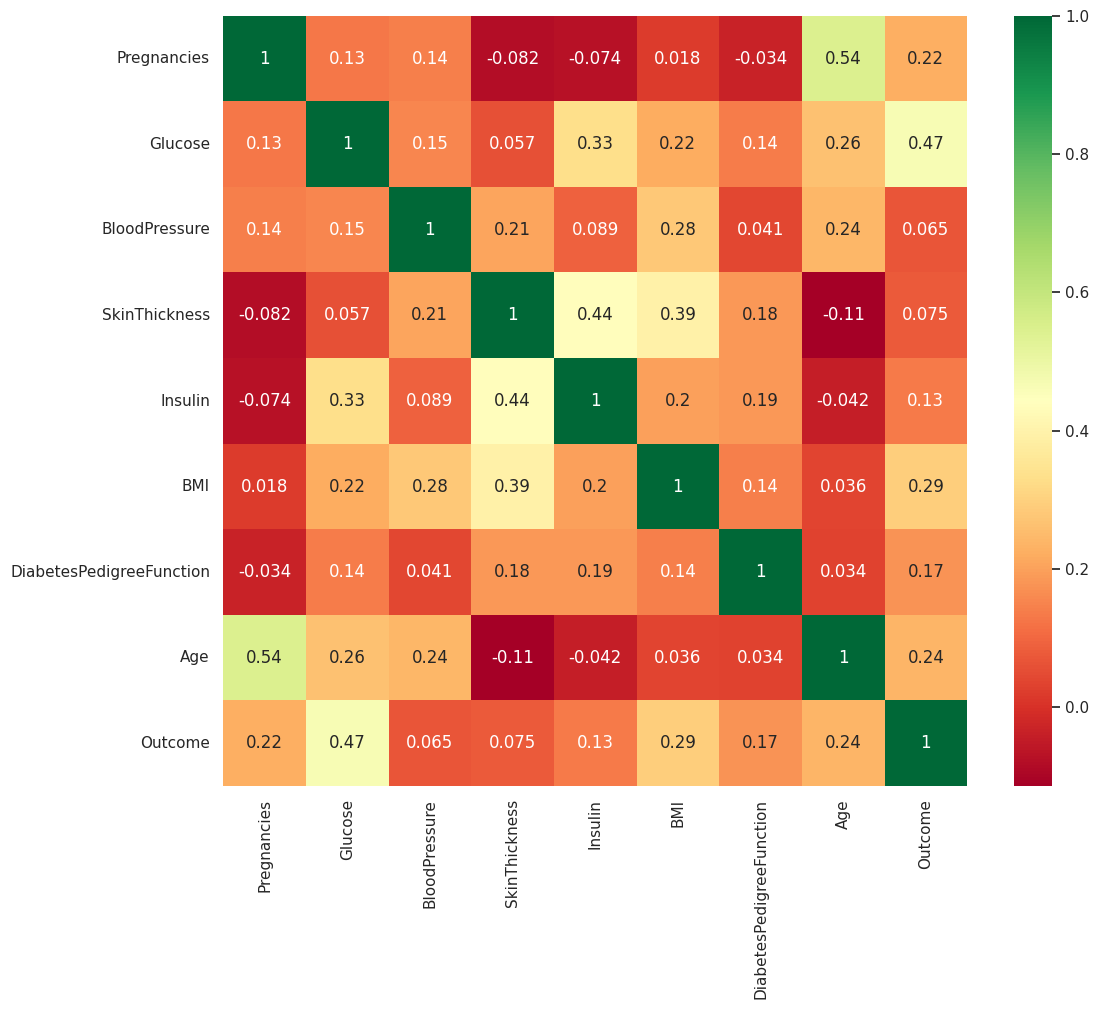

In [18]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap


### Heatmap for clean data


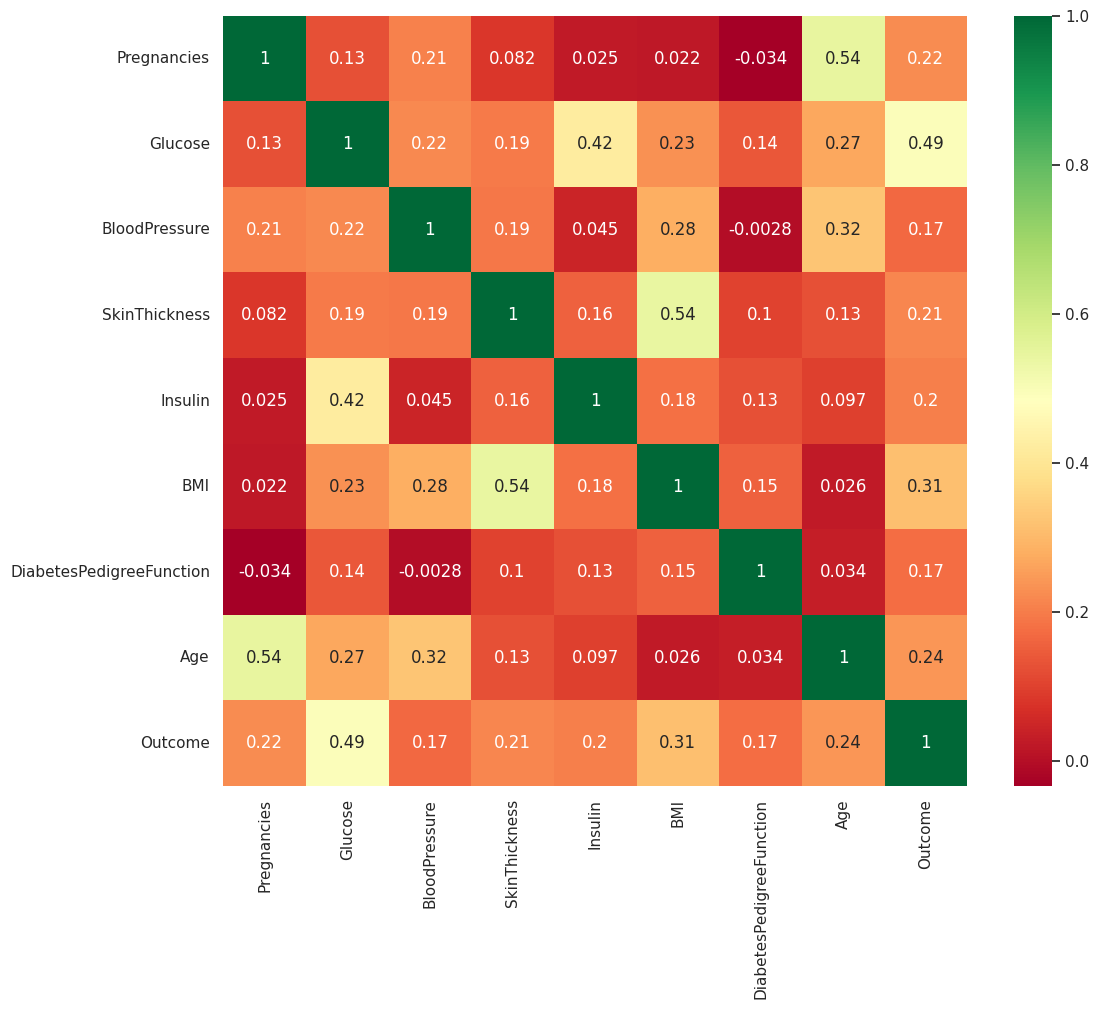

In [19]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

### Scaling the data: That is make mean =0 and variance = 1 for the data


### Why Scaling the data for KNN?

It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.

Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.


In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [22]:
y = df_copy.Outcome

In [23]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


### Test Train Split and Cross Validation methods

Train Test Split : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

----------------------------------------------------------------

Cross Validation: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques.

------------------------------------------------------------------

About Stratify : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.



In [24]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [25]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))



The score function is simply a utility function for a default metric to be used within some algorithms of scikit-learn (mostly the algorithms in the model selection module, e.g. GridSearchCV, or cross_validate), if no other metric is specified. So for classification, this is typically accuracy and for regression mean squared error

In [26]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [27]:
# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


### Result Visualization

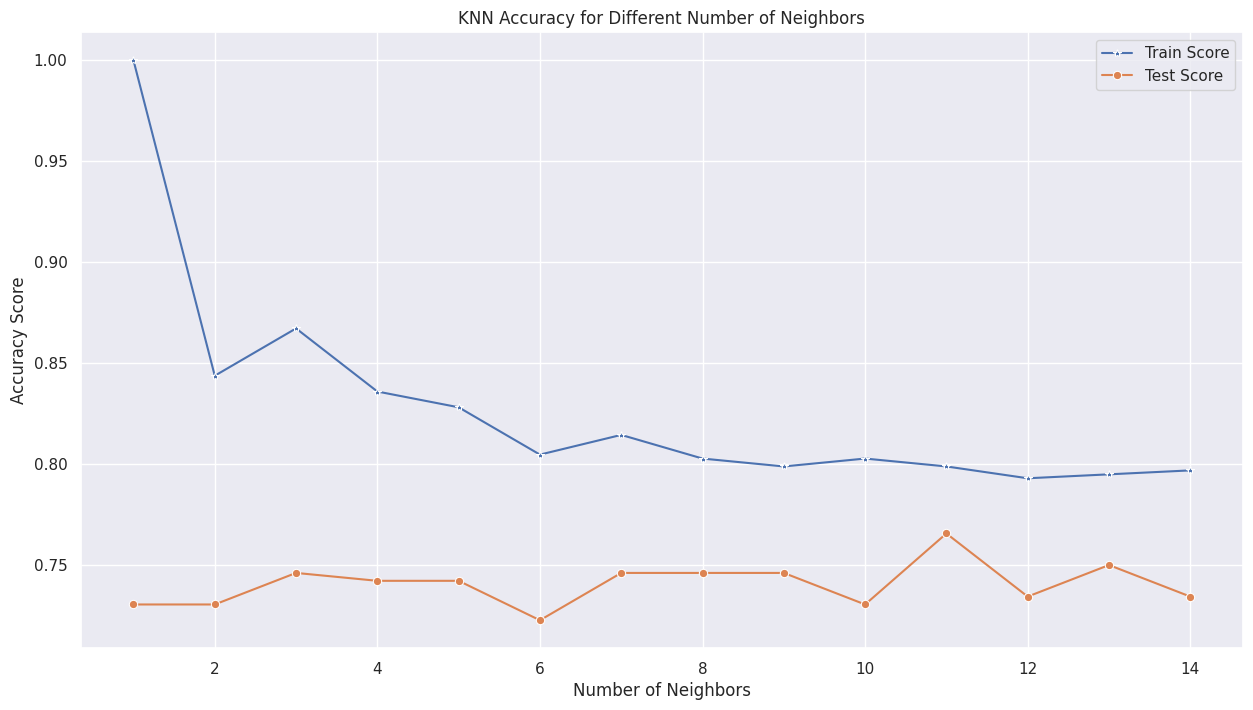

In [30]:
plt.figure(figsize=(15,8))
plot_train = sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
plot_test = sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy for Different Number of Neighbors')
plt.legend()
plt.show()



The best result is captured at k = 11 hence 11 is used for the final model.

In [31]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

#Trying to plot decision boundary

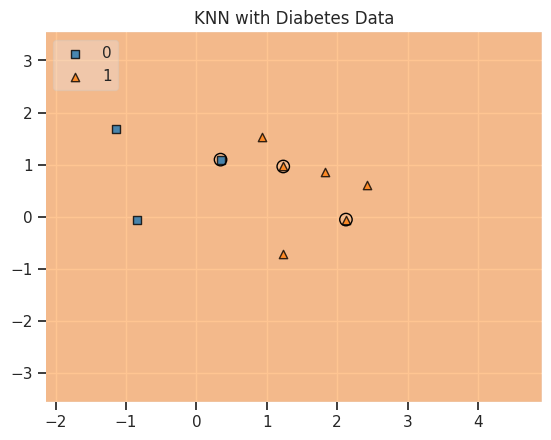

In [32]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()

## Model Performance Analysis


In [33]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


### 1) Confusion Matrix

Text(0.5, 19.049999999999997, 'Predicted label')

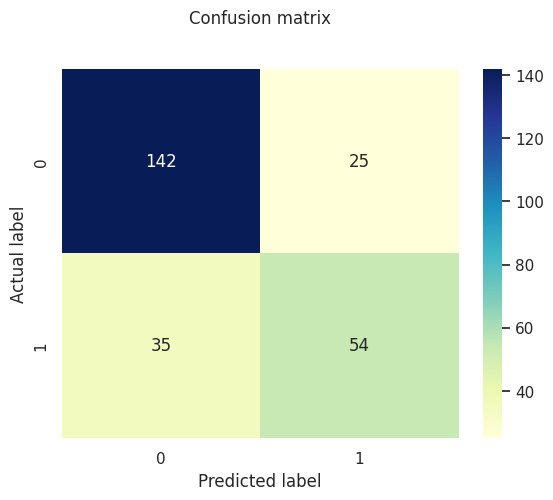

In [34]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 2) Classification Report

Precision Score

    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)




Recall Score

    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)



F1 Score

    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall.
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)





In [35]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



### 3) ROC - AUC

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [36]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

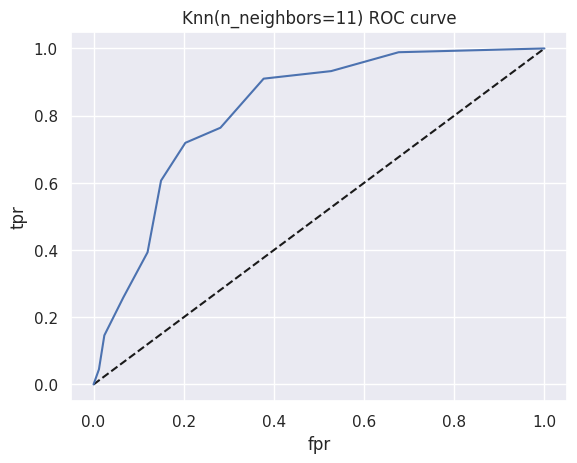

In [37]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [38]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096


Hyper Parameter optimization¶

Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

Let’s consider the following example:

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid.

Suppose, you defined the grid as: a1 = [0,1,2,3,4,5] a2 = [10,20,30,40,5,60] a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.


In [39]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
